# <b>1<span style='color:#0386f7de'>|</span> Importing libraries</b>

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from matplotlib import ticker
import warnings
warnings.filterwarnings('ignore')
import time
from scipy.stats import norm
import seaborn as sns

In [27]:
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn import tree

In [28]:
#Loading CSV file "Dataset preprocessed in step 1"
heart_database_step2 = pd.read_csv("Resources/heart_Database_Step2.csv")
heart_database_step2

,Unnamed: 0,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0,16.60,1,0,0,3.0,30.0,0,1,7,0,1,1,1,5.0,1,0,1
1,1,0,20.34,0,0,1,0.0,0.0,0,1,12,0,0,1,1,7.0,0,0,0
2,2,0,26.58,1,0,0,20.0,30.0,0,0,9,0,1,1,3,8.0,1,0,0
3,3,0,24.21,0,0,0,0.0,0.0,0,1,11,0,0,0,2,6.0,0,0,1
4,4,0,23.71,0,0,0,28.0,0.0,1,1,4,0,0,1,1,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315247,319789,0,22.22,0,0,0,0.0,0.0,0,1,0,1,0,1,0,8.0,0,0,0
315248,319790,1,27.41,1,0,0,7.0,0.0,1,0,8,1,1,0,3,6.0,1,0,0
315249,319791,0,29.84,1,0,0,0.0,0.0,0,0,3,1,0,1,1,5.0,1,0,0
315250,319792,0,24.24,0,0,0,0.0,0.0,0,1,5,1,0,1,2,6.0,0,0,0


# <b>9<span style='color:#0386f7de'>|</span> Machine Learning </b>

## 9-1 Analizing the balance of the dataset

Text(1, 13300, '26601')

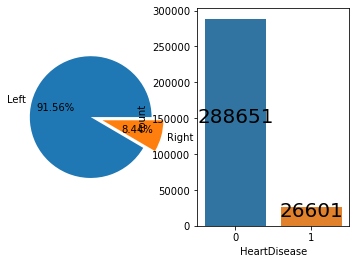

In [29]:
plt.subplot(121)
plt.pie(x = heart_database_step2.groupby(['HeartDisease']).HeartDisease.count().to_list(),
        labels = ["Left", "Right"], autopct='%1.2f%%', explode = (0, 0.2))

plt.subplot(122)
sns.countplot(data = heart_database_step2, x = 'HeartDisease')
zero, one = heart_database_step2.HeartDisease.value_counts()
plt.text(0, zero//2, zero, fontsize = 20,  horizontalalignment='center')
plt.text(1, one//2, one, fontsize = 20, horizontalalignment='center')

Dataset is unbalance and need to be corrected for a better machine learning model

## 9-1-1 Split Dataset for Training and Testing

In [30]:
X=heart_database_step2.drop(['HeartDisease'],axis=1)
y=heart_database_step2['HeartDisease']

In [31]:
X_encoded=pd.get_dummies(X)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_encoded_scaled=(scaler.fit_transform(X_encoded))

### 9-1-1 Performing the rebalance of the dataset

In [33]:
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y))
# define resampling
over = RandomOverSampler(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
# define pipeline
pipeline = Pipeline(steps=[
    ('o', over), 
    ('u', under)
])
X_encoded_scaled, y = pipeline.fit_resample(X_encoded_scaled, y)
# summarize class distribution
print(Counter(y))

Counter({0: 288651, 1: 26601})
Counter({0: 123707, 1: 86595})


In [34]:
# Split the dataset in training and testing to perform then Maching learning process.
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled,y, test_size=0.2, random_state=42)

### 9-1-2 Machine Learning Model - First Analysis

### Decision Tree Classifier

<AxesSubplot:>

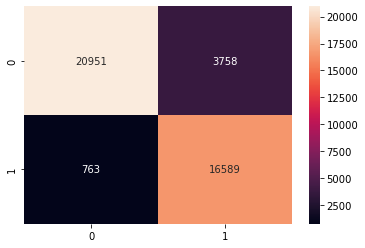

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier(random_state=1000)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_dt)
sns.heatmap(cm, annot=True, fmt="d")
# save the image
#plt.savefig("./Images/RandomOverSampler_confusion_matrix.png")

In [36]:
print('accuracy',accuracy_score((y_test), y_predict_dt))
print('precision',precision_score(y_test, y_predict_dt))
print('recall',recall_score(y_test, y_predict_dt))

accuracy 0.892513254558855
precision 0.8153044674890647
recall 0.9560281235592439


### Logistic Regresion

<AxesSubplot:>

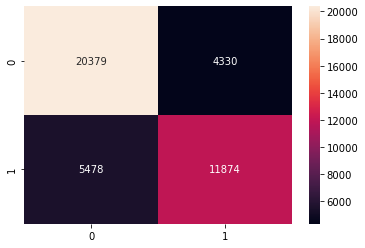

In [37]:
from sklearn.linear_model import LogisticRegression
lr =LogisticRegression()
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d")

In [38]:
print('accuracy',accuracy_score((y_test), y_predict_lr))
print('precision',precision_score(y_test, y_predict_lr))
print('recall',recall_score(y_test, y_predict_lr))

accuracy 0.7668148641259124
precision 0.7327820291286102
recall 0.6843015214384509


### Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

<AxesSubplot:>

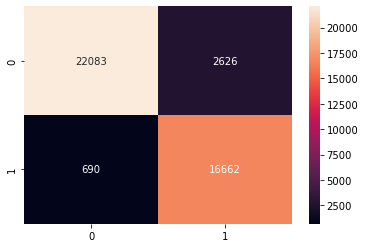

In [40]:
rf =RandomForestClassifier(random_state=1000) 
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")

In [41]:
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

accuracy 0.9211621216804166
precision 0.8638531729572791
recall 0.9602351313969572


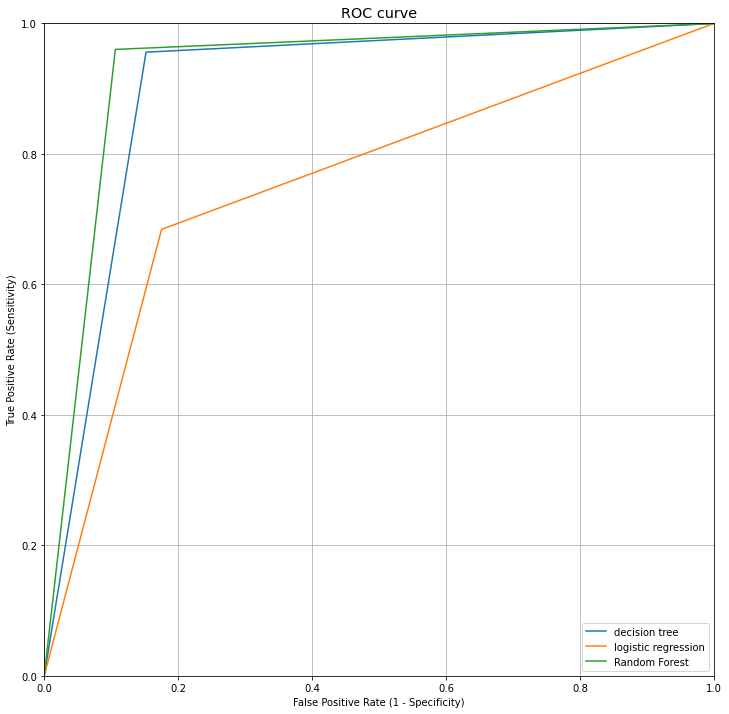

In [42]:
from sklearn import metrics

fpr_dt, tpr_dt, thresholds_dt = metrics.roc_curve(y_test, y_predict_dt)
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test, y_predict_lr)
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(y_test, y_predict_rf)
plt.figure(figsize=(12,12))
plt.plot(fpr_dt, tpr_dt, label="decision tree")
plt.plot(fpr_lr, tpr_lr, label="logistic regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)

# 9-2 Machine Learning Model - Improving the Models

### 9-2-1 Feature Selection

In [43]:
# Once we run the code in 9-2 once we have decided to select the folowing variables as the best predicting set of variables. 
# Creating feature matrix
X=heart_database_Step2.loc[:, ["Sex","AgeCategory","Race","BMI","Smoking","AlcoholDrinking","Stroke",
                          "GenHealth",
                          "PhysicalActivity",
                          "Diabetic",
                        "DiffWalking",
                               "KidneyDisease",
                               "MentalHealth"
                         ]]
y=heart_2020_Step2['HeartDisease']

NameError: name 'heart_2020_Step2' is not defined

In [ ]:
X.shape

(315252, 13)

In [ ]:
#X.info()

In [ ]:
# Check the balance of our target values
y.value_counts()

0    288651
1     26601
Name: HeartDisease, dtype: int64

In [ ]:
# For some reason the data type changed. Needed to make these adjustments to continue with ML.
X["Sex"]=X["Sex"].astype("bool")
X["AgeCategory"]=X["AgeCategory"].astype("category")
X["Race"]=X["Race"].astype("category")
X["Smoking"]=X["Smoking"].astype("bool")
X["AlcoholDrinking"]=X["AlcoholDrinking"].astype("bool")
X["Stroke"]=X["Stroke"].astype("bool")

X["GenHealth"]=X["GenHealth"].astype("category")
X["PhysicalActivity"]=X["PhysicalActivity"].astype("bool")
X["Diabetic"]=X["Diabetic"].astype("bool")
X["DiffWalking"]=X["DiffWalking"].astype("bool")
X["KidneyDisease"]=X["KidneyDisease"].astype("bool")

In [ ]:
# Use get_dummies to transform object dtypes
X_encoded = pd.get_dummies(X)
X_encoded.shape

(315252, 34)

In [ ]:
X_encoded.head()

,Sex,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalActivity,Diabetic,DiffWalking,KidneyDisease,MentalHealth,...,Race_1,Race_2,Race_3,Race_4,Race_5,GenHealth_0,GenHealth_1,GenHealth_2,GenHealth_3,GenHealth_4
0,True,16.60,True,False,False,True,True,False,False,30.0,...,0,0,0,0,0,0,1,0,0,0
1,True,20.34,False,False,True,True,False,False,False,0.0,...,0,0,0,0,0,0,1,0,0,0
2,False,26.58,True,False,False,True,True,False,False,30.0,...,0,0,0,0,0,0,0,0,1,0
3,True,24.21,False,False,False,False,False,False,False,0.0,...,0,0,0,0,0,0,0,1,0,0
4,True,23.71,False,False,False,True,False,True,False,0.0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# scale the X_encoded feature matrix
data_scaler=StandardScaler()

In [ ]:
# fit and transform our X_encoded
X_encoded_scaled = data_scaler.fit_transform(X_encoded)

### 9-2-2 Re-sampling

In [ ]:
# summarize class distribution
print(Counter(y))
# define resampling
over = RandomOverSampler(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.7)
# define pipeline
pipeline = Pipeline(steps=[
    ('o', over), 
    ('u', under)
])
X_encoded_scaled, y = pipeline.fit_resample(X_encoded_scaled, y)
# summarize class distribution
print(Counter(y))

Counter({0: 288651, 1: 26601})
Counter({0: 123707, 1: 86595})


In [ ]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_encoded_scaled,y,random_state= 1)

In [ ]:
# examine y_train counts
y_train.value_counts()

0    92647
1    65079
Name: HeartDisease, dtype: int64

### 9-2-3 Testing Improved Models

### Decision Tree Model

In [ ]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

# Fitting the model
model = model.fit(X_train, y_train)

In [ ]:
# Making predictions using the testing data
predictions = model.predict(X_test)

# predictions

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,25916,5144
Actual 1,1704,19812


In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

#acc_score

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,25916,5144
Actual 1,1704,19812


Accuracy Score : 0.8697504564820451
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.83      0.88     31060
           1       0.79      0.92      0.85     21516

    accuracy                           0.87     52576
   macro avg       0.87      0.88      0.87     52576
weighted avg       0.88      0.87      0.87     52576



### Random Forest Classifier

<AxesSubplot:>

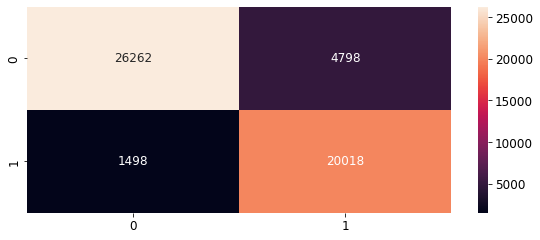

In [ ]:
rf =RandomForestClassifier(random_state=1000) 
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

accuracy 0.8802495435179549
precision 0.8066569954867827
recall 0.9303773935675776


### Balanced Random Forest Classifier

In [ ]:
# Resample the training data with the BalancedRandomForestClassifier
#model
brf_model = BalancedRandomForestClassifier(n_estimators=100,random_state=1)
#fit
brf_model = brf_model.fit(X_train, y_train)
#predict
predictions = brf_model.predict(X_test)

In [ ]:
# Calculated the balanced accuracy score
print(f"The balanced accuracy score is: {balanced_accuracy_score(y_test,predictions):.3f}")

The balanced accuracy score is: 0.877


In [ ]:
# Display the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[24914,  6146],
       [ 1042, 20474]])

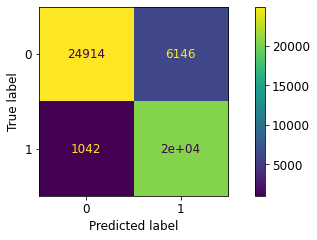

In [ ]:
# Confusion Matrix using ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=brf_model.classes_)
disp.plot()

# save image
#plt.savefig("./Images/BalancedRandomForestClassifier_confusion_matrix.png")

In [ ]:
# Print the imbalanced classification report
report=classification_report_imbalanced(y_test,predictions)
print("BalancedRandomForestClassifier")
print(report)

BalancedRandomForestClassifier
                   pre       rec       spe        f1       geo       iba       sup

          0       0.96      0.80      0.95      0.87      0.87      0.75     31060
          1       0.77      0.95      0.80      0.85      0.87      0.77     21516

avg / total       0.88      0.86      0.89      0.86      0.87      0.76     52576



In [ ]:
# List the features sorted in descending order by feature importance
important_features = brf_model.feature_importances_

#get column names
cols=X_encoded.columns

#create the dataframe
important_features_df = pd.DataFrame({'feature':cols,'importance':important_features})
#important_features_df

# Sort in descending order
important_features_df.sort_values('importance',ascending=False)

,feature,importance
1,BMI,0.416035
9,MentalHealth,0.076448
7,DiffWalking,0.046584
6,Diabetic,0.035976
22,AgeCategory_12,0.031954
4,Stroke,0.030519
29,GenHealth_0,0.030011
0,Sex,0.029185
2,Smoking,0.023081
32,GenHealth_3,0.021339


### Logistic Regression

<AxesSubplot:>

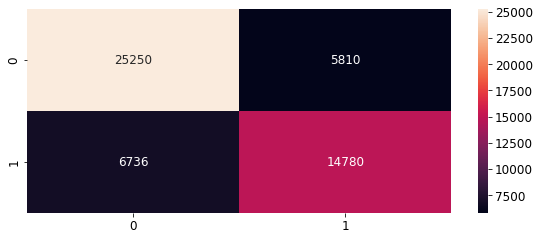

In [ ]:
lr =LogisticRegression(solver='lbfgs', max_iter=200,random_state=1)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
print('accuracy',accuracy_score((y_test), y_predict_lr))
print('precision',precision_score(y_test, y_predict_lr))
print('recall',recall_score(y_test, y_predict_lr))

accuracy 0.7613740109555691
precision 0.7178241864983002
recall 0.6869306562558096


# <b>10<span style='color:#0386f7de'>|</span> Final model selected</b>

accuracy 0.9211621216804166
precision 0.8638531729572791
recall 0.9602351313969572


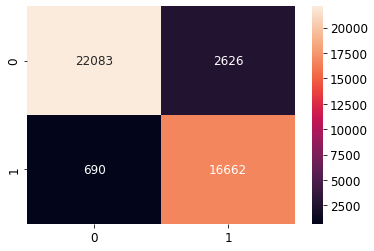

In [45]:
# We are have selected the Random Forest Classifier with the limited set of values expresed in 9
rf =RandomForestClassifier(random_state=1000) 
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
# confusion_matrix
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d")
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

In [46]:
print('accuracy',accuracy_score((y_test), y_predict_rf))
print('precision',precision_score(y_test, y_predict_rf))
print('recall',recall_score(y_test, y_predict_rf))

accuracy 0.9211621216804166
precision 0.8638531729572791
recall 0.9602351313969572
